In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data_dir = "../data"

In [75]:
df1 = pd.read_csv(os.path.join(data_dir, 'OD_202001_weekday.csv.xz'))
df1.head()

,ind,origin,destination,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,TAMPINES EAST,TAMPINES EAST,232925.0,1427066.0,2316704.0,1778107.0,1280905.0,1145098.0,1084878.0,...,1382846.0,1305843.0,1400255.0,1652029.0,2019632.0,1676532.0,1141877.0,984449.0,739684.0,391909.0
1,1,SENOKO NORTH,YISHUN CENTRAL,3560.0,14560.0,7020.0,6380.0,4740.0,4140.0,5820.0,...,10480.0,17540.0,22060.0,46820.0,55680.0,23640.0,16620.0,8300.0,4840.0,1940.0
2,2,FERNVALE,TRAFALGAR,2680.0,25980.0,19620.0,24980.0,14180.0,10240.0,8260.0,...,9060.0,10400.0,11820.0,18520.0,19040.0,12060.0,8360.0,7320.0,6780.0,3160.0
3,3,CHINATOWN,PORT,328.0,3482.0,1452.0,1084.0,1128.0,602.0,534.0,...,866.0,908.0,747.0,886.0,564.0,754.0,702.0,553.0,573.0,496.0
4,4,LAKESIDE,TAMAN JURONG,408.0,6854.0,12863.0,18283.0,7809.0,7015.0,6526.0,...,12956.0,23380.0,13425.0,15333.0,15933.0,8697.0,7677.0,4723.0,3355.0,1720.0


In [64]:
hours_col = [ col for col in df1.columns.tolist() if "hour" in col ]
sum_col = df1[hours_col[0]]
for col in hours_col[1:]:
    sum_col = sum_col + df1[col]
df1["sum_weekday"] = sum_col
df1.head()

,ind,origin,destination,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,sum_weekday
0,0,ANAK BUKIT,NORTH COAST,475.0,1159.0,2451.0,2489.0,2280.0,2280.0,2242.0,...,2793.0,3496.0,4199.0,3230.0,3743.0,5396.0,6023.0,4370.0,2584.0,52972.0
1,1,CLEMENTI CENTRAL,MARITIME SQUARE,4959.0,10450.0,15162.0,13167.0,10488.0,11590.0,10450.0,...,8018.0,8949.0,10678.0,12122.0,6821.0,4959.0,2280.0,1653.0,817.0,161177.0
2,2,PAYA LEBAR NORTH,PASIR RIS WEST,228.0,1197.0,1558.0,1843.0,3287.0,2565.0,5225.0,...,4180.0,5282.0,8455.0,11324.0,9348.0,7771.0,9044.0,5985.0,2622.0,93746.0
3,3,TRAFALGAR,TOA PAYOH WEST,1900.0,2299.0,1881.0,931.0,874.0,532.0,646.0,...,437.0,570.0,361.0,304.0,532.0,418.0,304.0,190.0,19.0,13794.0
4,4,BALESTIER,BALESTIER,17119.0,76646.0,126616.0,205219.0,167770.0,160056.0,171380.0,...,139840.0,149264.0,187492.0,224162.0,194617.0,134064.0,126901.0,102999.0,63460.0,2756330.0


In [65]:
df2 = pd.read_csv(os.path.join(data_dir, 'OD_201912_weekend.csv.xz'))
hours_col = [ col for col in df2.columns.tolist() if "hour" in col ]
sum_col = df2[hours_col[0]]
for col in hours_col[1:]:
    sum_col = sum_col + df2[col]
df2["sum_weekend"] = sum_col
df2.head()

,ind,origin,destination,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,sum_weekend
0,0,CLEMENTI CENTRAL,MARITIME SQUARE,969.0,3382.0,4009.0,5263.0,6042.0,7543.0,9519.0,...,7961.0,7486.0,6992.0,6859.0,4237.0,2470.0,874.0,817.0,570.0,98876.0
1,1,BALESTIER,BALESTIER,5890.0,32908.0,44973.0,66557.0,88179.0,86906.0,85614.0,...,64866.0,72067.0,76798.0,73302.0,66215.0,57171.0,56240.0,43871.0,30761.0,1180945.0
2,2,BUKIT MERAH,MALCOLM,19.0,38.0,19.0,19.0,19.0,0.0,19.0,...,0.0,19.0,19.0,38.0,114.0,38.0,0.0,38.0,19.0,551.0
3,3,BUKIT BATOK WEST,HONG KAH,133.0,1862.0,3192.0,3591.0,3781.0,3800.0,3477.0,...,2261.0,1938.0,2926.0,2850.0,2109.0,1729.0,1216.0,1254.0,1102.0,45980.0
4,4,KAKI BUKIT,SUNGEI ROAD,188.0,444.0,780.0,993.0,1042.0,1429.0,1483.0,...,1468.0,2221.0,3329.0,3586.0,1755.0,598.0,254.0,329.0,85.0,24359.0


In [66]:
df1b = df1.dropna(subset=["origin", "destination"])
df2b = df2.dropna(subset=["origin", "destination"])

In [67]:
df_merge = pd.merge(df1b[["origin", "destination", "sum_weekday"]], df2b[["origin", "destination", "sum_weekend"]], left_on=["origin", "destination"], right_on=["origin", "destination"], )
df_merge.head()

,origin,destination,sum_weekday,sum_weekend
0,ANAK BUKIT,NORTH COAST,52972.0,21166.0
1,CLEMENTI CENTRAL,MARITIME SQUARE,161177.0,98876.0
2,PAYA LEBAR NORTH,PASIR RIS WEST,93746.0,39653.0
3,TRAFALGAR,TOA PAYOH WEST,13794.0,5225.0
4,BALESTIER,BALESTIER,2756330.0,1180945.0


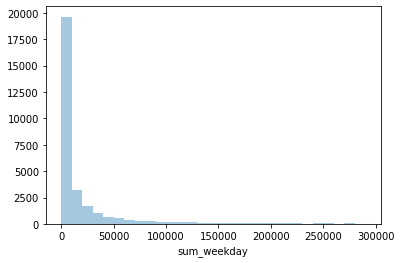

In [68]:
sns.distplot(df_merge["sum_weekday"], bins=[i*10000 for i in range(30)], kde=False)

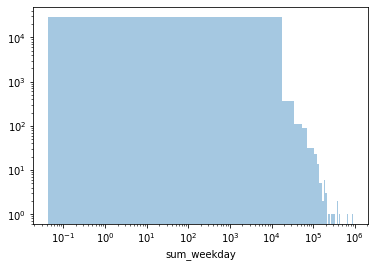

In [69]:
#bins = [i*1000 for i in range(30)] + [(df_merge["sum_weekday"]/23).max()]
fig, ax = plt.subplots()
sns.distplot(df_merge["sum_weekday"]/23, kde=False, ax=ax)
ax.set_yscale("log")
ax.set_xscale("log")

In [70]:
(df_merge["sum_weekday"]/23).max()

882286.8695652174

<function print>

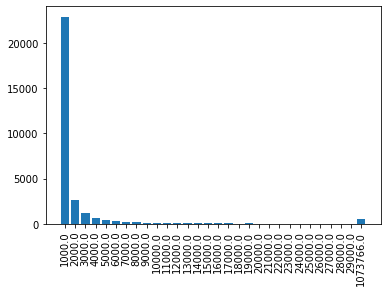

In [35]:
bins = [i*1000 for i in range(30)] + [np.ceil((df_merge["sum_weekday"]/23).max())]
hs, bins = np.histogram(df_merge["sum_weekday"]/23, bins=bins)
xs = [str(b) for b in bins[1:]]
fig, ax = plt.subplots()
ax.bar(xs, hs)
ax.set_xticks(xs)
ax.set_xticklabels(xs, rotation=90)
print()

In [9]:
df_merge.to_csv("edge_flow.csv.xz", index_label="ind")

In [36]:
len(df_merge)

30331

In [80]:
sum(df_merge[["sum_weekday", "sum_weekend"]].sum())/31/1000000

67.443449

In [73]:
df_merge2 = df_merge.copy()
df_merge2["sum_weekday"] = df_merge2["sum_weekday"]/23
df_merge2["sum_weekend"] = df_merge2["sum_weekend"]/8

In [74]:
df_merge2[["sum_weekday", "sum_weekend"]].sum()

sum_weekday    6.797432e+07
sum_weekend    6.614577e+07
dtype: float64

In [43]:
df_merge2.to_csv("edge_flow2.csv", index_label="ind")

In [47]:
len(sorted(set(df_merge2["origin"].tolist())))

303

In [55]:
import networkx as nx

In [60]:
dg1 = nx.read_pajek("../data/net_202001_weekday.net")
dg2 = nx.read_pajek("../data/net_202001_weekend.net")

dg1.number_of_edges()

30043

In [59]:
total = 0
for u,v,d in dg1.edges(data=True):
    total+=d["weight"]
total/1000000

64.80913669565248

In [61]:
total = 0
for u,v,d in dg2.edges(data=True):
    total+=d["weight"]
total/1000000

65.484590375